<a href="https://colab.research.google.com/github/Srujan-D/gennav/blob/Srujan-D-prm_example/examples/planners/Probabilistic_Roadmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Example of using Probabilistic Roadmap from GenNav

This is a tutorial about using the probabilistic roadmap code to plan a path between two states in our configuration space. We will be using A* search algorithm to find the optimal path along the graph constructed by the PRM algorithm.

### Setup

Let us first import all the classes and utilities needed from the gennav package. 

In [19]:
!git clone https://github.com/ERC-BPGC/gennav.git
%cd /content/gennav/gennav
!pip install -e gennav
%cd gennav

fatal: destination path 'gennav' already exists and is not an empty directory.
/content/gennav/gennav
Obtaining file:///content/gennav/gennav/gennav
  Found existing installation: gennav 0.1.1
    Can't uninstall 'gennav'. No files were found to uninstall.
  Running setup.py develop for gennav
/content/gennav/gennav/gennav


In [20]:
from gennav.envs import PolygonEnv  # imports polygon environment
from gennav.envs.common import visualize_path
from gennav.planners.prm.prm import (
    PRM,  # imports Probabilistic Roadmap class from the planers
)
from gennav.utils import RobotState
from gennav.utils.geometry import Point
from gennav.utils.samplers import UniformRectSampler
from gennav.utils.visualisation import visualize_graph

Some of the parameters and variables used are:

*`general_obstacle_list`*: obstacles in shapely defined by their vertices.
         
*`sampler`* = UniformRectSampler(): samples points between some minimum and maximum values of x and y
(here: -5 < x < 15 and -5 < y < 15 are used)

*`r`* = maximum distance for joining two nodes from the graph

*`n`* = number of nodes in the graph

### Using PRM to plan the path:

In [21]:
def eg_prm_plan():
    general_obstacles_list = [
        [[(8, 5), (7, 8), (2, 9), (3, 5)], [(3, 3), (3, 5), (5, 5), (5, 3)]],
        [
            [(2, 10), (7, 10), (7, 1), (6, 1), (6, 6), (4, 6), (4, 9), (2, 9)],
            [(4, 0), (4, 5), (5, 5), (5, 0)],
            [(8, 2), (8, 7), (10, 7), (10, 2)],
        ],
    ]

    sampler = UniformRectSampler(-5, 15, -5, 15)
    polygon = PolygonEnv()
    start = RobotState(position=Point(0, 0))
    goal = RobotState(position=Point(12, 10))

    my_tree = PRM(sampler=sampler, r=5, n=100)

    # Plan a path using the PRM.plan method for each obstacle
    for obstacles in general_obstacles_list:
        polygon.update(obstacles)  # updates the environment with the obstacle
        path, _ = my_tree.plan(start, goal, polygon)

        visualize_path(path, polygon)

        if len(path.path) != 1:    # check if the path has only the start state
            assert polygon.get_traj_status(path) is True

/content/gennav/gennav/gennav/gennav/envs/common.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


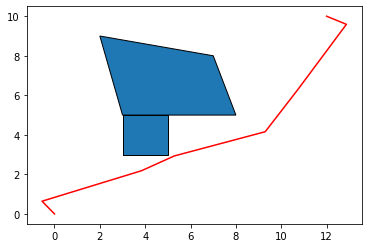

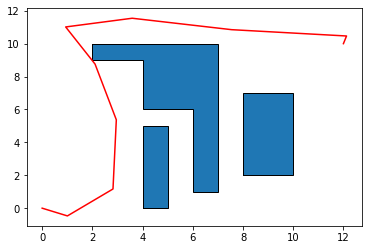

In [22]:
eg_prm_plan()

### Using PRM to just construct a graph:

In [23]:
def eg_prm_construct():
    general_obstacles_list = [
        [[(8, 5), (7, 8), (2, 9), (3, 5)], [(3, 3), (3, 5), (5, 5), (5, 3)]],
        [
            [(2, 10), (7, 10), (7, 1), (6, 1), (6, 6), (4, 6), (4, 9), (2, 9)],
            [(4, 0), (4, 5), (5, 5), (5, 0)],
            [(8, 2), (8, 7), (10, 7), (10, 2)],
        ],
    ]

    sampler = UniformRectSampler(-5, 15, -5, 15)
    polygon = PolygonEnv()
    my_tree = PRM(sampler=sampler, r=5, n=100)

    # Construct a graph in the configuration space of each obstacle using the PRM.construct method
    for obstacles in general_obstacles_list:
        polygon.update(obstacles)  # updates the environment with the obstacle
        graph = my_tree.construct(polygon)  # noqa: F841

        visualize_graph(graph, polygon)

/content/gennav/gennav/gennav/gennav/utils/visualisation.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


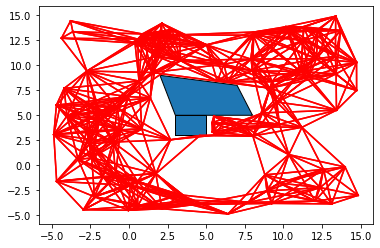

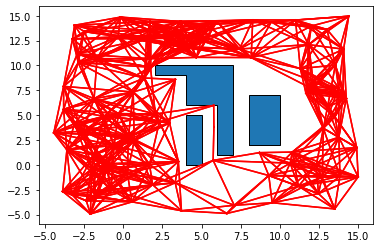

In [24]:
eg_prm_construct()